In [1]:
# Summary statistics

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
food_consumption = pd.read_csv("D:/Data Science/Data Sources/Data Camp/food_consumption.csv")

print(food_consumption.head())

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96


In [3]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.132727272727266
12.59
44.650000000000006
14.58


In [4]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]
 
# Group by country, select consumption column, and compute mean and median 
print(be_and_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


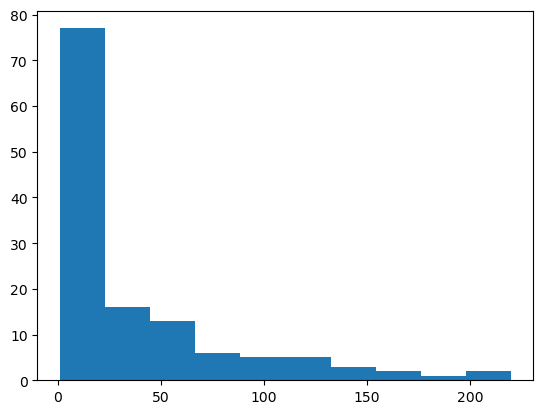

In [5]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption.co2_emission)
plt.show() 

In [6]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [7]:
# calculating spread

In [8]:
# calculating variances and quartiles

# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [9]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [10]:
# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


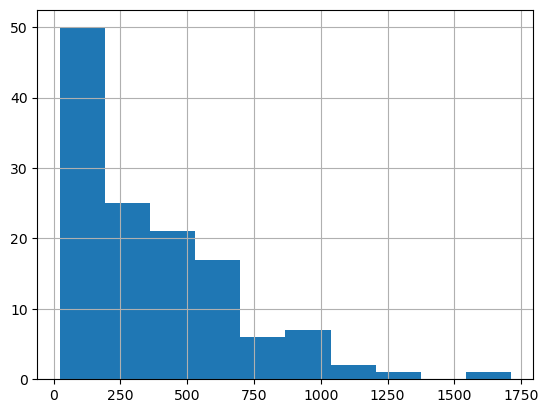

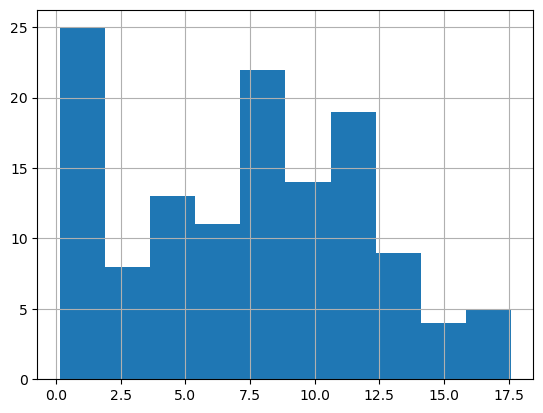

In [11]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var,np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] =='eggs']['co2_emission'].hist()
# Show plot
plt.show()

In [12]:
# finding outliers using IQR

#Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. 
# Store the resulting DataFrame as emissions_by_country.

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(np.sum)

print(emissions_by_country)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,0.25) 
q3 = np.quantile(emissions_by_country,0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
# a data point is an outlier if: data < Q1 - 1.5 x iqr or data > + 1.5 * IQR
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr


country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [13]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [14]:
# probability

amir_deals = pd.read_csv("D:/Data Science/Data Sources/Data Camp/amir_deals.csv")

print(amir_deals.head())

   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17


In [15]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

# Calculate probability of picking a deal with each product
probs = counts / amir_deals['product'].shape[0]
print(probs)

probs_sort = probs.sort_values()

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [16]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_without_replacement = amir_deals.sample(5, replace = True)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


In [17]:
# continuous distributions

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30) # for uniform distributions (arg :  desired value, min, max)
print(prob_less_than_5)                                                                       

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30) # deduct to 1
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30) 
print(prob_between_10_and_20)


0.16666666666666666
0.8333333333333334
0.3333333333333333


[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

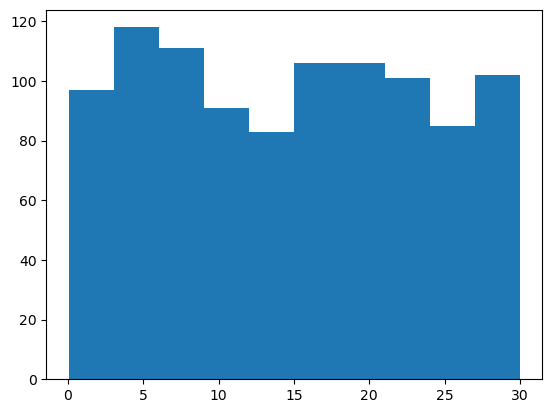

14.807111978323789


In [18]:
#simulating waiting times

# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30,size = 1000)
print(wait_times)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

wait_times_mean = np.mean(wait_times)
print(wait_times_mean)



In [19]:
# binomial distribution - two possible outcomes - should be independent trials so binomial distribution can be applied

# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1,0.30, size = 1))  # args: binom.rvs(# of outcomes desired ,prob of success for outcome, size = # of trials for outcome)

# Simulate 1 week of 3 deals
print(binom.rvs(3,0.30, size = 1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.30,size = 52)

# Print mean deals won per week
print(np.mean(deals))

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3) # args: (num of deals, num of trials, prob  of  success)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.30)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.30)

print(prob_greater_than_1)


[1]
[0]
0.8461538461538461
0.026999999999999996
0.784
0.21599999999999997


In [20]:
# expected value
 #  expected value = n x p

# Expected number won with 30% win rate: #of sales  of 3 worked on with 30%  win rate
won_30pct = 3 * 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 *0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17
mean: 4812.000337078652
stdd: 2052.383697078496


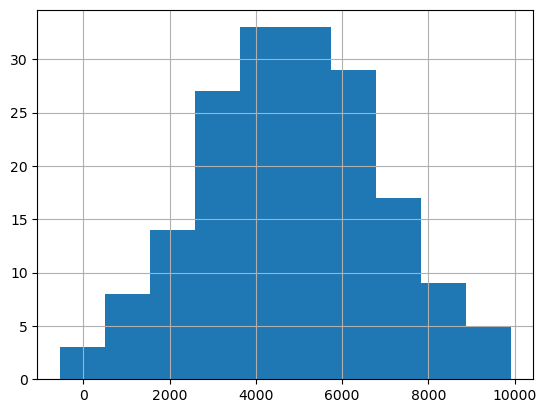

In [21]:
# normal distribution -  bell-shaped distribution
    # described by mean and stdd

print(amir_deals.head())

amount_mean = np.mean(amir_deals['amount'])
print('mean: ' + str(amount_mean))
amount_stdd = np.std(amir_deals['amount'])
print('stdd: ' + str(amount_stdd))


# Histogram of amount with 10 bins and show plot

amir_deals['amount'].hist(bins =  10)
plt.show() # plot shows normal distribution

In [22]:
from scipy.stats import norm

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,  amount_mean,amount_stdd)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, amount_mean,amount_stdd)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, amount_mean,amount_stdd) - norm.cdf(3000, amount_mean,amount_stdd)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,  amount_mean,amount_stdd)

print(pct_25)

0.9048507292128808
0.9683695021571027
0.6681540168075063
3427.6885699296663


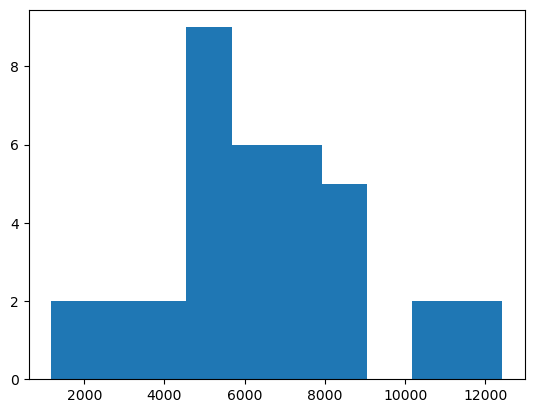

In [23]:
#  simulating  with normal distribution

mean = 5000
stdd = 2000

# new mean and std
new_mean = mean * 1.2
new_sd = stdd  * 1.3

# simulate 36 new sales

new_sales = norm.rvs(new_mean, new_sd, size  =  36)

plt.hist(new_sales)
plt.show()

In [24]:
print(1  - norm.cdf(1000, 5000, 2000)) # current market
print(1 - norm.cdf(1000, new_mean, new_sd)) # predicted market

0.9772498680518208
0.9727648049862613


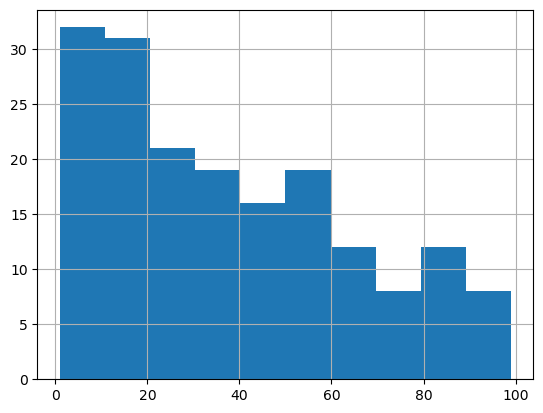

In [25]:
# central limit theorem

amir_deals['num_users'].hist()
plt.show()

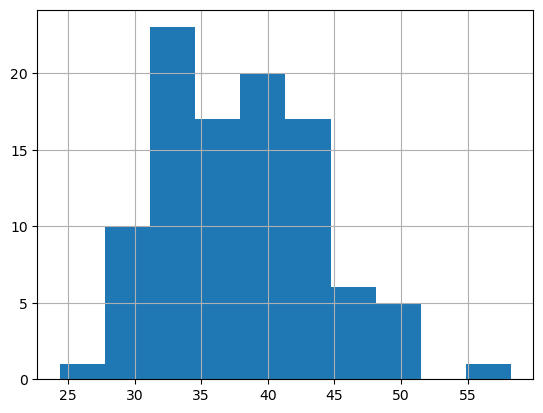

In [26]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [27]:
#mean of means

# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20, replace =True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

38.821666666666665
37.651685393258425


In [28]:
# Poisson process/distrubution 
# events appear to happen at a certain rate, but completely random
    # num of animals adopted from a shelter per week
        # prob of >= 5 animals adopted per week
    # num of people arriving at a restaurant per hour
        # prob of 12 people arriving per hour
    # time unit is irrelevant as long as it is consistent when used in the same situation
# describe by lambda = average/mean num of events per time interval

from scipy.stats import poisson

# Prob of a single value!
# whats the prob of adoptions of 5 in a week with a lambda of 8 (mean)?
print(poisson.pmf(5,8)) # args: (desired value, lambda)

# prob of a less than or equal to!
# adoptions of 5 or less in a week; lambda of 8
print(poisson.cdf(5,8))

# prob of greater or equal!
print(1-poisson.cdf(5,8))

# generating samples of adoptions over 10 weeks
print(poisson.rvs(8, size = 10 ))

0.09160366159257921
0.19123606207962532
0.8087639379203747
[9 5 9 6 8 3 3 6 9 9]


In [29]:
# prob of 5 responses with mean of 4
prob_5 = poisson.pmf(5,4)
print(prob_5)

0.1562934518505317


In [30]:
# Probability of 5 responses mean = 5.5
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


In [31]:
# Probability of 2 or fewer responses mean = 4
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


In [32]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


In [33]:
# Exponential distribution
    # the same as the poisson distribution / measures frequency in terms of time between events
        # prob of > 1 day between adoptions
        # prob of < 10 mins between restau arrivals
    # also uses lambda (rate)
    # continuous(time)

# on average, 1 customer ticket generated per 2 minutes
    # lambda = 0.5 ticket per minute
    # exponential = 1 ticket per 2 minutes (1/lambda)

from scipy.stats import expon

# how long until a new request is created? = P(wait<1min) = expon.cdf(1, scale = 0.5)

print(expon.cdf(1, scale = 0.5))

# P(wait > 3 min)

print(1 - expon.cdf(3, scale = 0.5))

# P( 1 min < wait < 3 min)

print(expon.cdf(3, scale = 0.5) - expon.cdf(1, scale = 0.5))

0.8646647167633873
0.0024787521766663767
0.13285653105994633


In [34]:
#  on average, 1 response takes 2.5 hrs for Amir

# lamba = 1/2.5 = 0.4 response per hr

# P(response > 1 hr)
print(expon.cdf(1, scale = 2.5))

# P(response > 4 hrs)
print(1 - expon.cdf(4, scale = 2.5))

# P(3 hrs < response < 4 hrs)
print(expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5))



0.3296799539643607
0.20189651799465536
0.09929769391754684


In [44]:
# Correlation
    # x = independent variable
    # y = dependent variable
    # correlation coefficient = -1 or 1 (nearer to 1, stronger relationship; close to 0, weak to no relationship )
        # as x increases, y increases (strong relationship)
        # knowing x will know what y should be

# computing correlation
    # using .corr function 
        # df[col].corr(df[col])

world_happiness = pd.read_csv("D:\Data Science\Data Sources\Data Camp\world_happiness.csv")

print(world_happiness.head())
print(world_happiness.info())
print(world_happiness.describe())


   Unnamed: 0      country  social_support  freedom  corruption  generosity  \
0           1      Finland             2.0      5.0         4.0        47.0   
1           2      Denmark             4.0      6.0         3.0        22.0   
2           3       Norway             3.0      3.0         8.0        11.0   
3           4      Iceland             1.0      7.0        45.0         3.0   
4           5  Netherlands            15.0     19.0        12.0         7.0   

   gdp_per_cap  life_exp  happiness_score  
0        42400      81.8              155  
1        48300      81.0              154  
2        66300      82.6              153  
3        47900      83.0              152  
4        50500      81.8              151  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       143 non-null    int64  
 1   country       

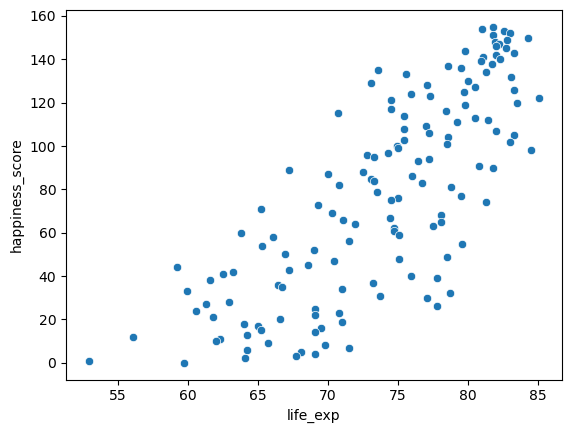

In [46]:
import seaborn as sns

# correlation between happiness_score and life_exp
sns.scatterplot(x = 'life_exp', y = 'happiness_score', data = world_happiness)
plt.show()


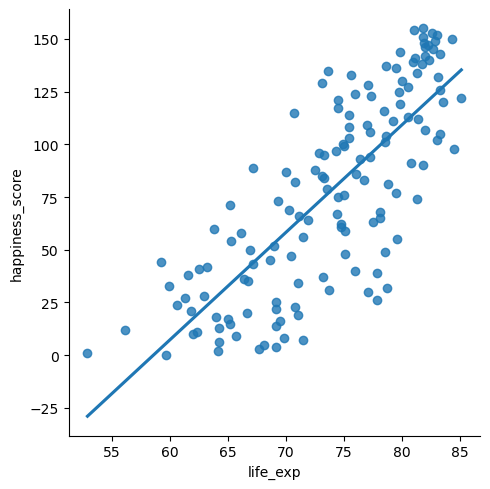

In [49]:
# with trendline

sns.lmplot(x='life_exp', y='happiness_score', data = world_happiness, ci= None)
plt.show()

In [52]:
# calculate correlation

cor = world_happiness['happiness_score'].corr(world_happiness['life_exp'])
print(cor)

0.7802249053272061


In [53]:
# correlation caveats

    # we can logarithmically transform data if the data is skewed, among other reasons, to check if the correlation is strong or weak and to check if the relationship is linear
    # other transformations:
        # square root transformation
        # reciprocal (1 / x)
        # combination of logs for x and y or among these    
        # why transform?
            # stats methods rely on linear relationship

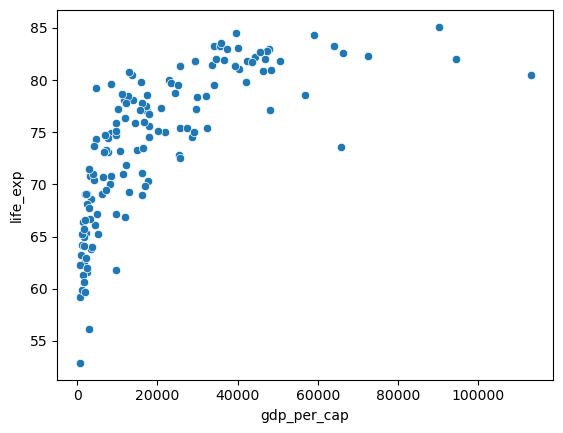

0.7019547642148014

In [58]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x = 'gdp_per_cap', y = 'life_exp', data = world_happiness)

# Show plot
plt.show() # data is skewed

# correlation
world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

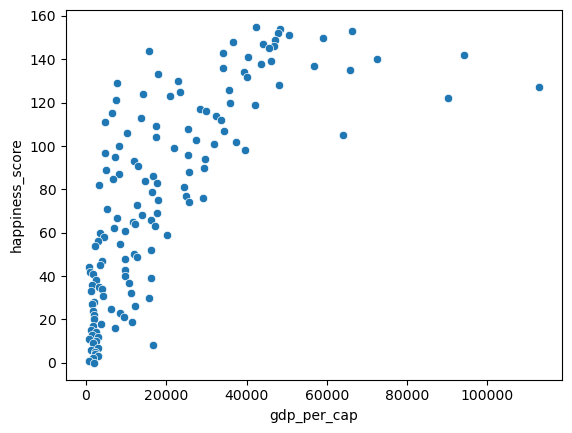

0.7279733012222975

In [62]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x = 'gdp_per_cap', y = 'happiness_score', data = world_happiness)
plt.show()

# Calculate correlation
world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])

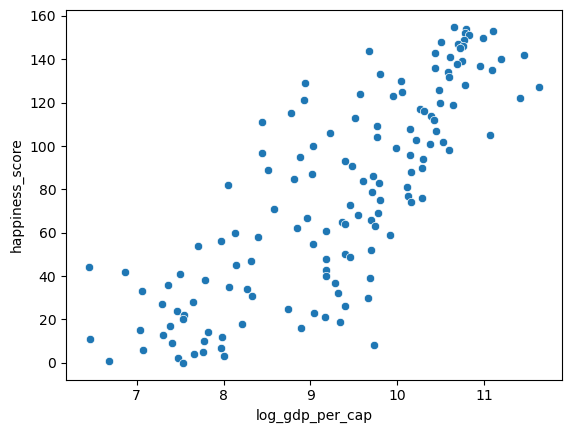

0.8043146004918288

In [64]:
# add new column of log gdp_per_capita
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# plot
sns.scatterplot(x = 'log_gdp_per_cap', y = 'happiness_score', data = world_happiness)
plt.show()

world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score']) # positive correlation